In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm 
import seaborn as sns

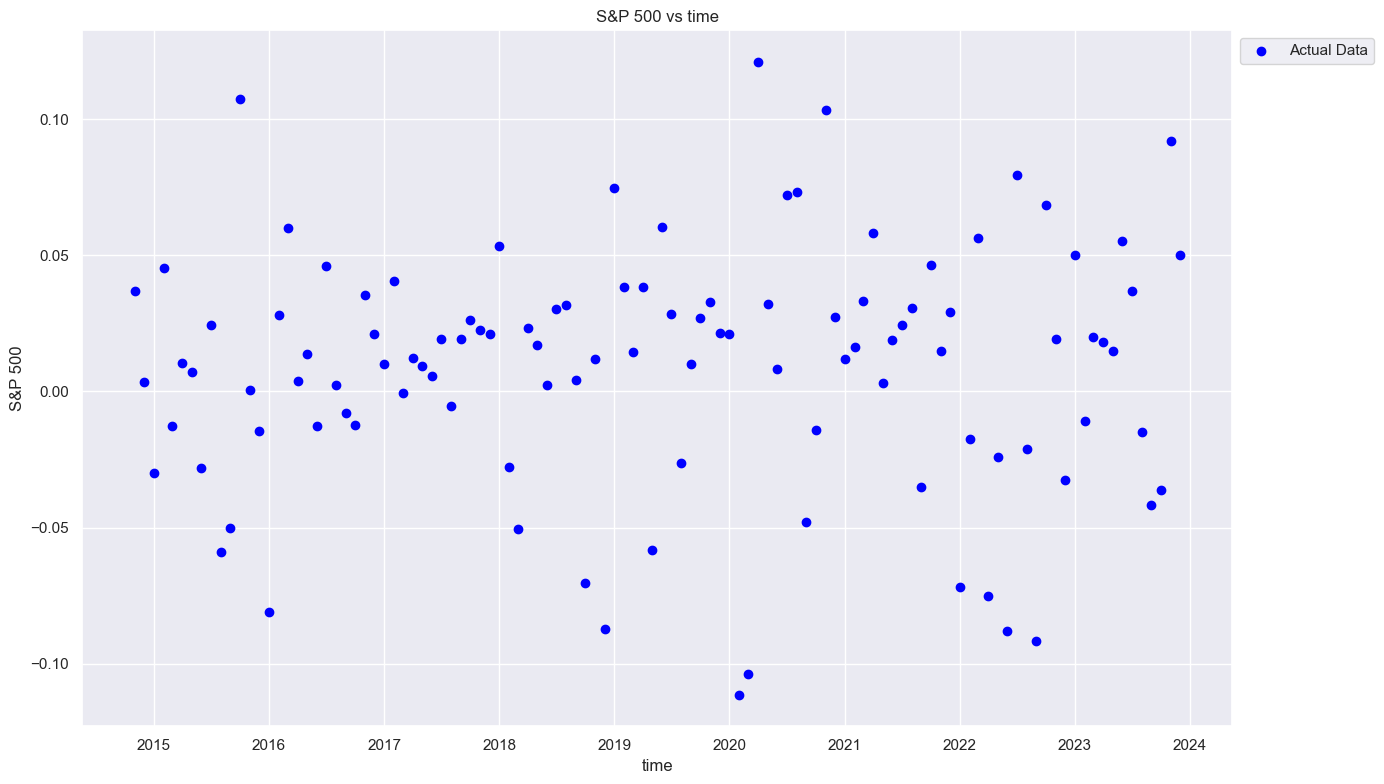

In [48]:
# Load the combined data
combined_data = pd.read_csv("combined data.csv")

# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Plot the data and the line of best fit
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Plot the actual data as a scatter plot
plt.scatter(combined_data['Date'], combined_data['SP_500'], label="Actual Data", color='blue')

plt.xlabel('time')
plt.ylabel('S&P 500')
plt.title('S&P 500 vs time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [50]:
combined_data['Date_ordinal'] = combined_data['Date'].map(pd.Timestamp.toordinal)

formula = 'SP_500 ~ Date_ordinal'

# Fit the model using the formula interface
model = ols(formula, data=combined_data).fit()

# Print the summary of the model
print(model.summary())

# Perform an analysis of variance (ANOVA)
print(anova_lm(model))

                            OLS Regression Results                            
Dep. Variable:                 SP_500   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1082
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.743
Time:                        12:20:16   Log-Likelihood:                 186.50
No. Observations:                 110   AIC:                            -369.0
Df Residuals:                     108   BIC:                            -363.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0630      3.259     -0.326   

$$\hat{y} = -1.0630 + 1.45 \times 10^{-6} x$$

This means that, as Date increases by 1 unit (for the next month), the S&P 500 is predicted to have a stock return of $1.45 \times 10^{-6}$ more than the previous month.

As seen above, the results of the F-test show a p-value of $0.743$ which means that the regression is not statistically significant.

The Durbin-Watson test result of 2.178 means that there is no autocorrelation in the data and the Independence assumption is validated.

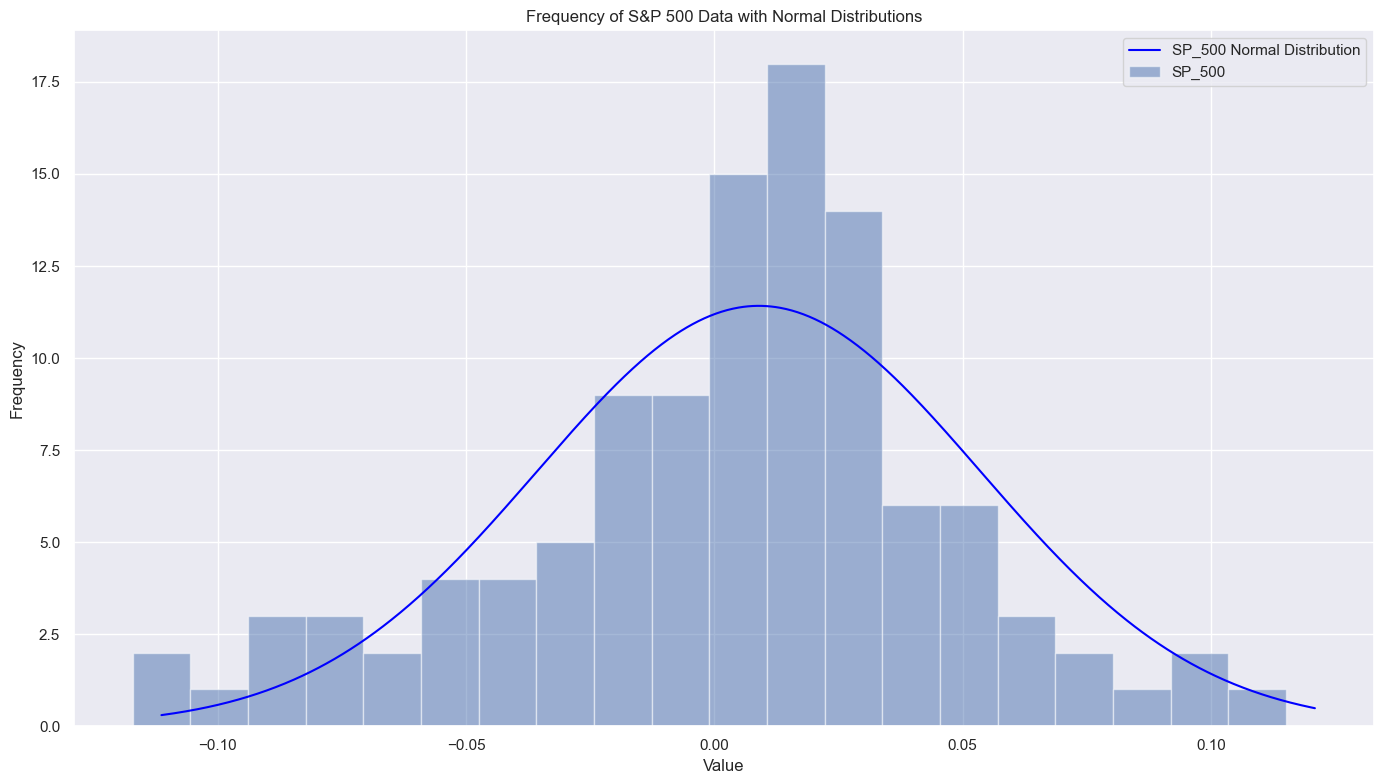

Mean of S&P 500: 0.008945052426154499
Standard Deviation of S&P 500: 0.044632635770704164


In [56]:
# Create a histogram for SP_500
sp500_hist, bins = np.histogram(combined_data['SP_500'], bins=20)

# Plot the histograms as bar graphs
plt.figure(figsize=(14, 8))
plt.bar(bins[:-1], sp500_hist, width=(bins[1] - bins[0]), alpha=0.5, label='SP_500')

# Calculate the mean and standard deviation of SP_500 and AAPL data
mean_sp500 = combined_data['SP_500'].mean()
std_dev_sp500 = combined_data['SP_500'].std()

# Generate points on the x axis for plotting the normal distributions
x = np.linspace(min(bins), max(bins), 1000)

# Plot the normal distribution for SP_500
sp500_normal_dist = stats.norm.pdf(x, mean_sp500, std_dev_sp500)
plt.plot(x, sp500_normal_dist * len(combined_data['SP_500']) * (bins[1] - bins[0]), label='SP_500 Normal Distribution', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of S&P 500 Data with Normal Distributions')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(f"Mean of S&P 500: {mean_sp500}")
print(f"Standard Deviation of S&P 500: {std_dev_sp500}")

In [52]:
print(anderson(model.resid))

AndersonResult(statistic=1.4331360467394205, critical_values=array([0.557, 0.634, 0.761, 0.888, 1.056]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-7.745698022370623e-16, scale=0.04461030329442234)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


As seen above, the data looks Normally Distributed with a mean of $\approx 0$, so the normality and mean 0 assumptions are validated.

This is also shown in the Anderson-Darling test above which successfully fit the distribution to the data.

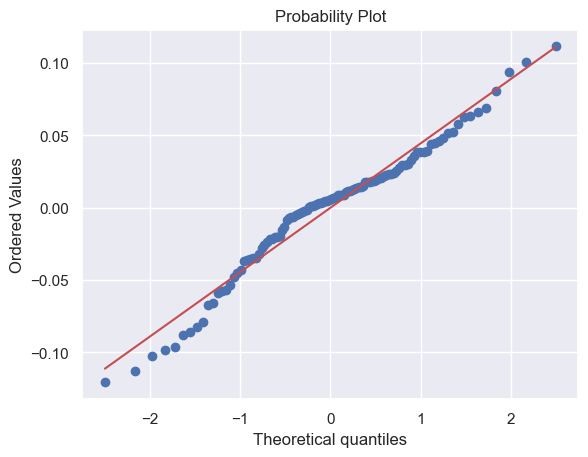

In [53]:
stats.probplot(model.resid, plot=plt)
plt.show()

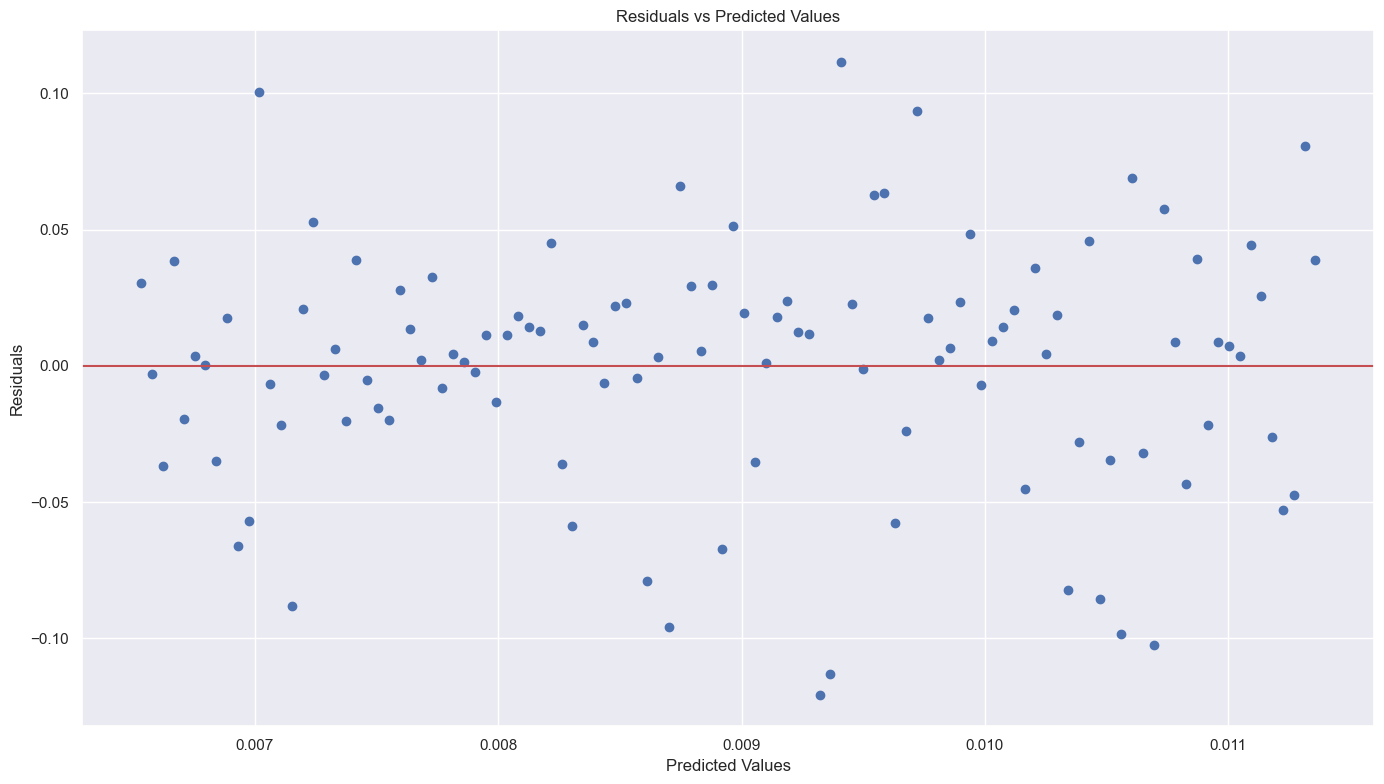

In [54]:
# Plot the residuals vs the predicted values
plt.figure(figsize=(14, 8))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

The above residuals vs predicted values does not show a pattern, which validates the constant variance assumption.

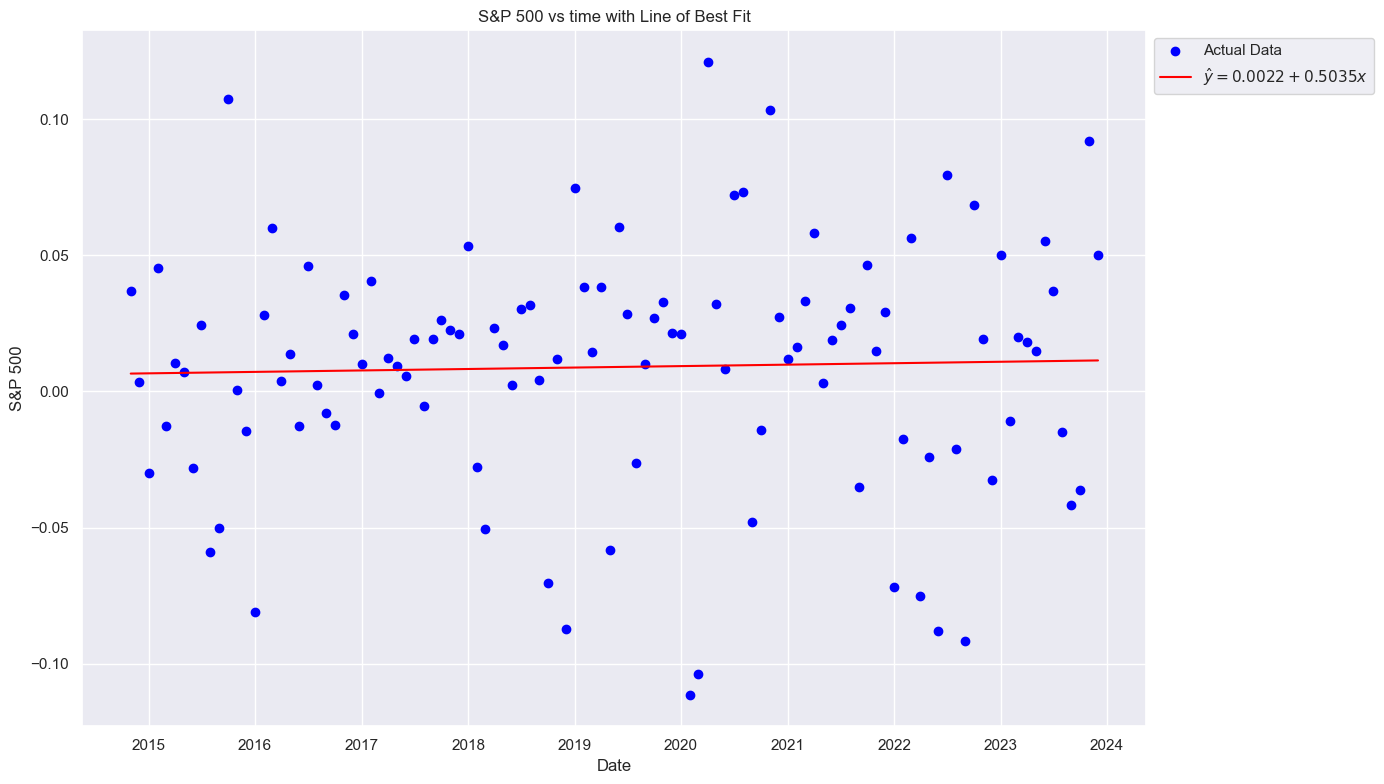

In [55]:
combined_data['Predicted'] = model.params['Intercept'] + model.params['Date_ordinal'] * combined_data['Date_ordinal']

# Plot the data and the line of best fit
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Plot the actual data as a scatter plot
plt.scatter(combined_data['Date'], combined_data['SP_500'], label="Actual Data", color='blue')

# Plot the regression line
plt.plot(combined_data['Date'], combined_data['Predicted'], label=r'$\hat{y} = 0.0022 + 0.5035 x$', color='red')

plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.title('S&P 500 vs time with Line of Best Fit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
